First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Summary statistics of the dataset:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000  

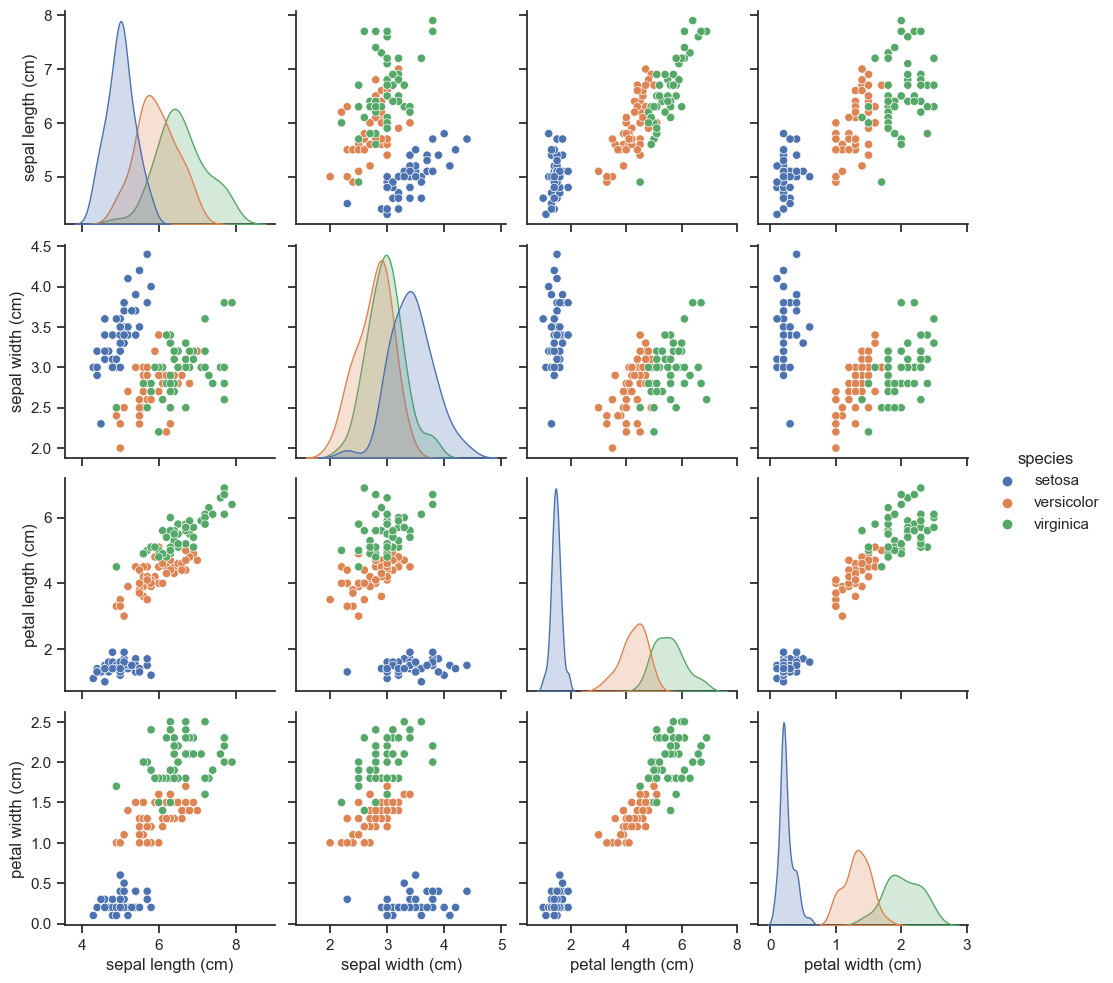

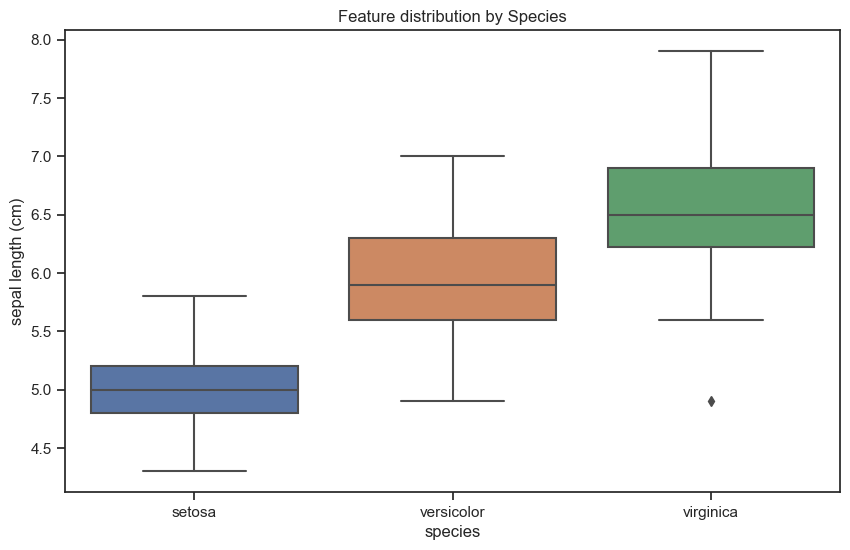


Classification Accuracy: 1.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


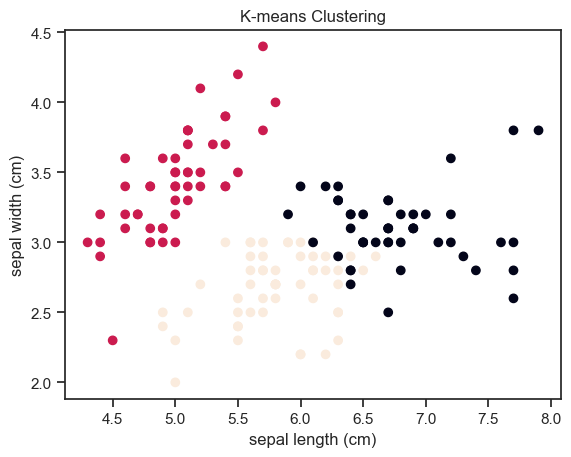

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()

# Convert the dataset into a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(iris_df.head())

# Summary statistics
print("\nSummary statistics of the dataset:")
print(iris_df.describe())

# Class distribution
print("\nClass distribution:")
print(iris_df['species'].value_counts())

# Pairwise scatter plot
sns.set(style="ticks")
sns.pairplot(iris_df, hue='species')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
plt.title('Feature distribution by Species')
sns.boxplot(x='species', y='sepal length (cm)', data=iris_df)
plt.show()




# Classification Task

# Split the dataset into features (X) and target variable (y)
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression classifier
classifier = LogisticRegression()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
classification_accuracy = accuracy_score(y_test, y_pred)
print("\nClassification Accuracy:", classification_accuracy)


# Clustering Task

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a K-means clustering model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

# Predict the clusters for the data points
y_clusters = kmeans.predict(X_scaled)

# Visualize the clusters
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=y_clusters)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('K-means Clustering')
plt.show()
